In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('customer_churn_data.csv')

## 1. Exploratory Data Analysis

In [138]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.2+ KB


In [140]:
df.isna().sum().sum()

np.int64(297)

In [141]:
df['InternetService'] = df['InternetService'].fillna('')

In [142]:
df.isna().sum().sum()

np.int64(0)

In [143]:
df.duplicated().sum()

np.int64(0)

In [144]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [145]:
numeric_columns_data = df.select_dtypes(include='number')

In [146]:
numeric_columns_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


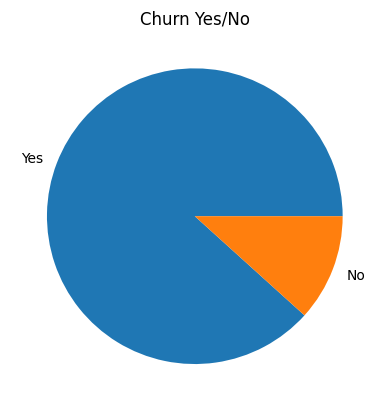

In [147]:
df['Churn'].value_counts().plot(kind='pie')
plt.title('Churn Yes/No')
plt.ylabel('')
plt.show()

In [148]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [149]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean()

Churn  Gender
No     Female    65.091912
       Male      59.013878
Yes    Female    74.975064
       Male      77.082518
Name: MonthlyCharges, dtype: float64

In [150]:
df.groupby('Churn')['Tenure'].mean()

Churn
No     30.264957
Yes    17.476784
Name: Tenure, dtype: float64

In [151]:
df.groupby('Churn')['Age'].mean()

Churn
No     43.487179
Yes    44.831257
Name: Age, dtype: float64

### At the lower terms we can see that the monthly charge average decreases

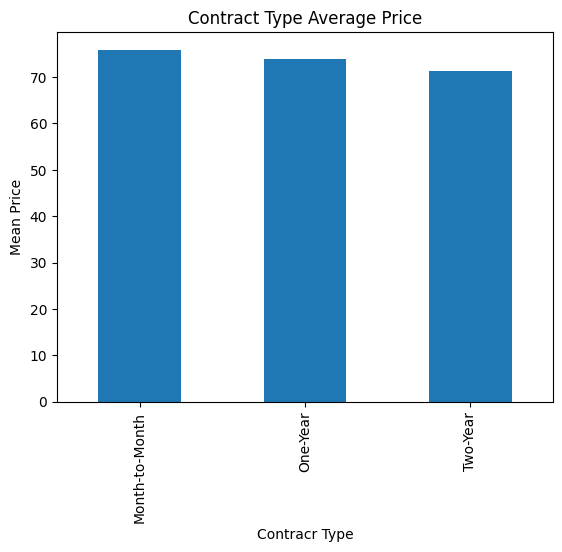

In [152]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar')
plt.ylabel('Mean Price')
plt.xlabel('Contracr Type')
plt.title('Contract Type Average Price')
plt.show()


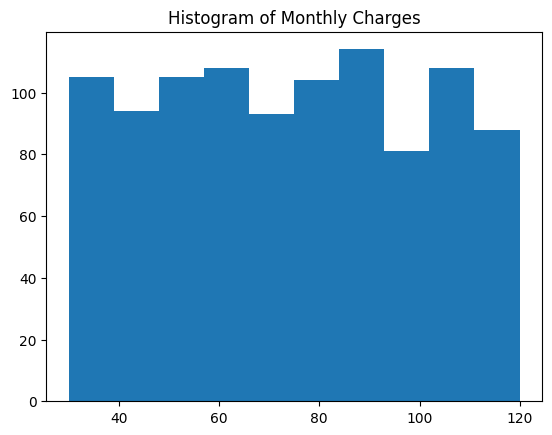

In [153]:
plt.hist(df['MonthlyCharges'])
plt.title('Histogram of Monthly Charges')
plt.show()

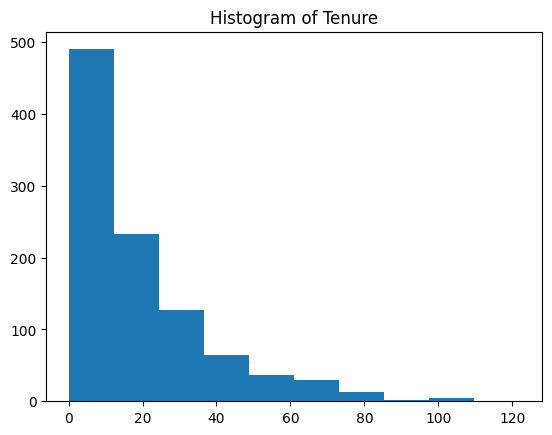

In [154]:
plt.hist(df['Tenure'])
plt.title('Histogram of Tenure')
plt.show()

## 2. Feature Engineering

In [155]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [156]:
y = df['Churn']
X = df[['Age', 'Gender', 'Tenure', 'MonthlyCharges']]

In [157]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,Male,4,88.35
1,43,Male,0,36.67
2,51,Female,2,63.79
3,60,Female,8,102.34
4,42,Male,32,69.01
...,...,...,...,...
995,42,Male,41,37.14
996,62,Male,9,80.93
997,51,Female,15,111.72
998,39,Male,68,65.67


In [158]:
# 1 = Female , 0 = Male

X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

/tmp/ipykernel_41545/2262879458.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Female' else 0)


In [159]:
y

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
995    Yes
996    Yes
997    Yes
998    Yes
999    Yes
Name: Churn, Length: 1000, dtype: object

In [160]:
# Yes = 1 , No = 0

y = y.apply(lambda x: 1 if x == 'Yes' else 0)

In [161]:
y

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Churn, Length: 1000, dtype: int64

In [162]:
type(y[0])

numpy.int64

# 3. Model Selection

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [164]:
from sklearn.preprocessing import StandardScaler

In [165]:
scaler = StandardScaler()

In [166]:
X_train = scaler.fit_transform(X_train)

In [167]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [168]:
X_test = scaler.fit_transform(X_test)

In [169]:
print(X_train.shape)
print(X_test.shape)

(800, 4)
(200, 4)


In [170]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
    print('Accuracy score on model is {}'.format(accuracy_score(y_test, predictions)))

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
log_model = LogisticRegression()

In [173]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [174]:
X

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01
...,...,...,...,...
995,42,0,41,37.14
996,62,0,9,80.93
997,51,1,15,111.72
998,39,0,68,65.67


In [175]:
# predict for person who : age = 40, gender = 0, tenure = 20, Monthly charge = 80
log_model.predict([[40, 0, 20, 80]])[0]

np.int64(1)

In [176]:
y_pred = log_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1])

In [177]:
modelperformance(y_pred)

Accuracy score on model is 0.875


In [178]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [179]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights' : ['uniform', 'distance'],
}

In [180]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv= 5)

In [181]:
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [182]:
gridkn.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [183]:
gridkn.predict(X_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [184]:
y_pred = gridkn.predict(X_test)

In [185]:
modelperformance(y_pred)

Accuracy score on model is 0.845


In [186]:
from sklearn.svm import SVC

In [187]:
svm = SVC()

In [188]:
param_grid = {
    'C': [0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

In [189]:
gridsvc =  GridSearchCV(svm, param_grid, cv= 5)

In [190]:
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [191]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [192]:
y_pred = gridsvc.predict(X_test)

In [193]:
modelperformance(y_pred)

Accuracy score on model is 0.88


In [194]:
from sklearn.tree import DecisionTreeClassifier

In [195]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]

}

In [196]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [197]:
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [198]:
grid_tree.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [199]:
y_pred = grid_tree.predict(X_test)

In [200]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1])

In [201]:
modelperformance(y_pred)

Accuracy score on model is 0.875


In [202]:
from sklearn.ensemble import RandomForestClassifier

In [203]:
rfc_model = RandomForestClassifier()

In [204]:
param_grid = {
    'n_estimators': [32, 64, 128, 256],
    'max_features': [2, 3, 4],
    'bootstrap': [True, False]
}

In [205]:
grid_rfc = GridSearchCV(rfc_model, param_grid, cv=5)

In [206]:
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128, 256]})

In [207]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 256}

In [208]:
y_pred = grid_rfc.predict(X_test)

In [209]:
modelperformance(y_pred)

Accuracy score on model is 0.86


In [210]:
best_model = gridsvc.best_estimator_

In [211]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [212]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')